
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.
it involves collecting, aggregating, cleaning, and organizing the data to be consumed by the algorithms designed to make discoveries or to create models.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes


<a id=section2></a>

### 2. Data Loading and Description
![image.png](attachment:image.png)

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :|
| PassengerId   | Passenger Identity                                        |
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           |
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Some Background Information
The sinking of the RMS Titanic in the early morning of __15 April 1912, four days into the ship's maiden voyage__ from __Southampton to New York City__, was one of the deadliest peacetime maritime disasters in history, __killing more
than 1,500 people__. The largest passenger liner in service at the time, Titanic had an __estimated 2,224 people on
board__ when she struck an __iceberg in the North Atlantic__. The ship had received __six warnings__ of sea ice but
was travelling at near __maximum speed when the lookouts sighted the iceberg__. Unable to turn quickly enough, the
ship suffered a glancing blow that buckled the starboard (right) side and opened __five of sixteen compartments to
the sea__. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the __unequal treatment__ of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the __International Convention for the Safety of Life at Sea (1914)__, which continues to govern maritime safety.

In [126]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#### Importing packages                                          

In [127]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output ###Assignment



#### Importing the Dataset

In [128]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/amity1415/DS/main/EKeeda/titanicRawData.csv")



In [129]:
type(titanic_data)

pandas.core.frame.DataFrame

In [130]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
type(titanic_data)

pandas.core.frame.DataFrame

In [132]:
titanic_data.info() ## It helps provide the sturcture of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
type(titanic_data['Name'][0])

str

In [134]:
i = titanic_data.Name[1]
type(i)

str

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns.
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

In [135]:
#Generate Pandas Pre profiling report
#Perform Data Preprocessing based on Issues shown by the Pre Profiling reprot
# Generate Pandas Profiling report --> Post Profiling report--> Verify, If my data is fine for processing(analysis.)

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [136]:
titanic_data.shape ## This will print the number of rows and columns of the Data Frame

(891, 12)

titanic_data has __891 rows__ and __12 columns.__

In [137]:
titanic_data.columns # THis will print the names of all columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [138]:
 titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id=section301></a>

In [139]:
 titanic_data.tail() # This will print the last n rows of the Data Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [140]:
titanic_data.isnull().sum() # Finding the count of null values in the data set.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [141]:
titanic_data.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


From the above output we can see that __Age__ and __Cabin__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot.
- _Grannular level_ analysis of each column.

In [142]:
 profile = pandas_profiling.ProfileReport(titanic_data)

In [143]:
 profile.to_file(output_file="titanic_before_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 40.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

In [144]:
for name in titanic_data.Name:
    print(name)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [145]:
titanic_data.drop(['PassengerId','Name'], axis=1, inplace=True)

In [146]:
titanic_data.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S


In [147]:
titanic_data.groupby('Pclass')['Fare'].median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [148]:
#Lets try to replace the missing embarked value
titanic_data['Embarked'].value_counts() #Value Counts

,count
Embarked,
S,644
C,168
Q,77


In [149]:
titanic_data['Embarked'].isnull()# Finding out the details of the the passanger whose Embarked Data is null

,Embarked
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [150]:
titanic_data[titanic_data['Embarked'].isnull()] # Finding out the details of the the passanger whose Embarked Data is null

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,female,62.0,0,0,113572,80.0,B28,NaN


In [151]:
titanic_data[titanic_data['Ticket'] == '113572']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,female,62.0,0,0,113572,80.0,B28,NaN


In [152]:
titanic_data[titanic_data['Cabin'] == 'B28']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,female,62.0,0,0,113572,80.0,B28,NaN


In [153]:
#Create a column that will give an representation of Ticket Price Per passenger.

In [154]:
titanic_data['Ticket'].value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [155]:
titanic_data[titanic_data['Ticket']=='347082']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,0,3,male,39.0,1,5,347082,31.275,NaN,S
119,0,3,female,2.0,4,2,347082,31.275,NaN,S
541,0,3,female,9.0,4,2,347082,31.275,NaN,S
542,0,3,female,11.0,4,2,347082,31.275,NaN,S
610,0,3,female,39.0,1,5,347082,31.275,NaN,S
813,0,3,female,6.0,4,2,347082,31.275,NaN,S
850,0,3,male,4.0,4,2,347082,31.275,NaN,S


In [156]:
titanic_data[titanic_data['Pclass']==3]['Fare'].median()

8.05

In [157]:
titanic_data.groupby('Ticket').agg({'Ticket':'count','Fare':'mean'})

,Ticket,Fare
Ticket,,
110152,3,86.500
110413,3,79.650
110465,2,52.000
110564,1,26.550
110813,1,75.250
...,...,...
W./C. 6608,4,34.375
W./C. 6609,1,7.550
W.E.P. 5734,1,61.175


In [158]:
titanic_data['Ticket_Pass_Count']= titanic_data.groupby('Ticket')['Ticket'].transform('count')

In [159]:
#titanic_data.drop('Ticket_Count', axis=1,inplace=True)

In [160]:
#Looking at a 3rd class Fare where #passenger on a single ticket is 1 (sibsp and parch=0)
titanic_data['FarePerPass']= titanic_data['Fare']/(titanic_data['Ticket_Pass_Count'])

In [161]:
titanic_data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.250000
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.283300
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.925000
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,2,26.550000
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,8.050000
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,1,8.458300
6,0,1,male,54.0,0,0,17463,51.8625,E46,S,1,51.862500
7,0,3,male,2.0,3,1,349909,21.0750,NaN,S,4,5.268750
8,1,3,female,27.0,0,2,347742,11.1333,NaN,S,3,3.711100
9,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2,15.035400


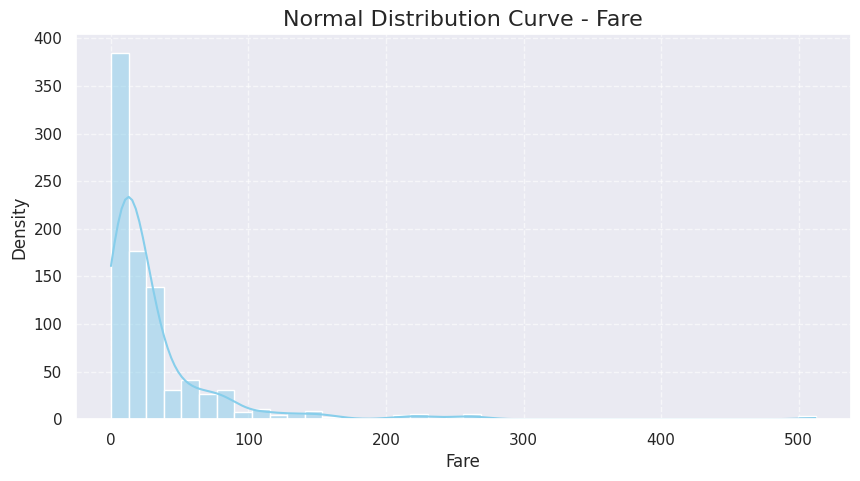

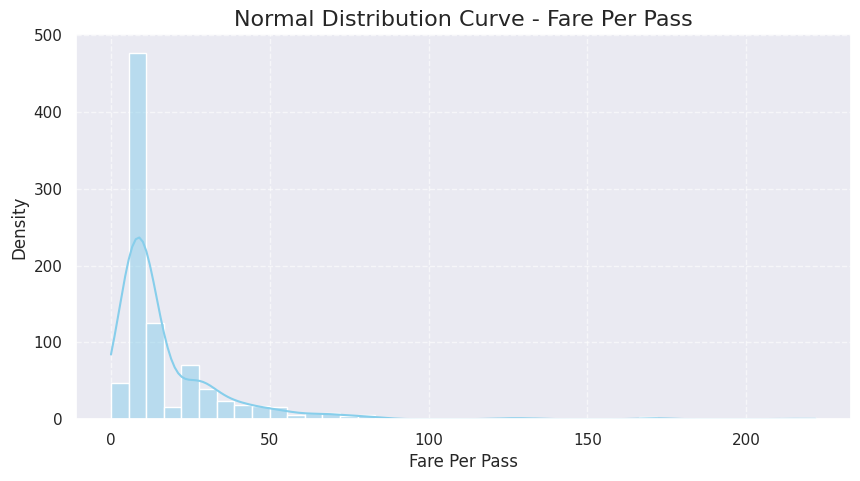

In [162]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_data['Fare'], kde=True, bins=40, color='skyblue')
plt.title('Normal Distribution Curve - Fare', fontsize=16)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
#'''''''''''''''''''''''''""#
plt.figure(figsize=(10,5))
sns.histplot(titanic_data['FarePerPass'], kde=True, bins=40, color='skyblue')
plt.title('Normal Distribution Curve - Fare Per Pass', fontsize=16)
plt.xlabel('Fare Per Pass')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [163]:
titanic_data[titanic_data['Fare']>=80.0].head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass
27,0,1,male,19.0,3,2,19950,263.0,C23 C25 C27,S,4,65.75


In [164]:
titanic_data[titanic_data['Embarked'].isnull()] # Finding out the details of the the passanger whose Embarked Data is null

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass
61,1,1,female,38.0,0,0,113572,80.0,B28,NaN,2,40.0
829,1,1,female,62.0,0,0,113572,80.0,B28,NaN,2,40.0


In [165]:
titanic_data['Embarked'].mode()
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [166]:
titanic_data[ (titanic_data['Embarked']=='C') & (titanic_data['Pclass']== 1) & (titanic_data['Sex']=='female')]['FarePerPass'].median()

45.5396

In [167]:
titanic_data[ (titanic_data['Embarked']=='S') & (titanic_data['Pclass']== 1) & (titanic_data['Sex']=='female')]['FarePerPass'].median()

31.65

In [168]:
titanic_data[ (titanic_data['Embarked']=='Q') & (titanic_data['Pclass']== 1) & (titanic_data['Sex']=='female')]['FarePerPass'].median()

45.0

In [169]:
titanic_data['Embarked'].mode() # To find the mode of the Embarked Data

,Embarked
0,S


In [170]:
#titanic_data['Embarked'].mode()[0] #Getting the Mode Value using the [0] index

In [171]:
titanic_data.Embarked.fillna('C' ,inplace=True) # Inline Changes ##Any Questions???
#titanic_data= titanic_data.Embarked.fillna('C' ,inplace=True)
#titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2308283639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data.Embarked.fillna('C' ,inplace=True) # Inline Changes ##Any Questions???


In [172]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    object 
 3   Age                714 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Ticket             891 non-null    object 
 7   Fare               891 non-null    float64
 8   Cabin              204 non-null    object 
 9   Embarked           891 non-null    object 
 10  Ticket_Pass_Count  891 non-null    int64  
 11  FarePerPass        891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [173]:
#titanic_data[titanic_data['Embarked'].isnull()]
titanic_data[titanic_data['Embarked'].isnull()]['Embarked'] # We get a series when we expect a column output.

,Embarked


In [174]:
titanic_data['Age'].median()

28.0

In [175]:
titanic_data[titanic_data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,1,8.458300
17,1,2,male,NaN,0,0,244373,13.0000,NaN,S,1,13.000000
19,1,3,female,NaN,0,0,2649,7.2250,NaN,C,1,7.225000
26,0,3,male,NaN,0,0,2631,7.2250,NaN,C,1,7.225000
28,1,3,female,NaN,0,0,330959,7.8792,NaN,Q,1,7.879200
...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,2629,7.2292,NaN,C,1,7.229200
863,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,7,9.935714
868,0,3,male,NaN,0,0,345777,9.5000,NaN,S,1,9.500000
878,0,3,male,NaN,0,0,349217,7.8958,NaN,S,1,7.895800


In [176]:
titanic_data[(titanic_data['Sex']=='female') & (titanic_data['Survived']==1)  ]['Age'].median()

28.0

In [177]:
titanic_data[(titanic_data['Sex']=='male') & (titanic_data['Survived']==1)]['Age'].median()

28.0

In [178]:
titanic_data[titanic_data['Age'].isnull()]['Survived']

,Survived
5,0
17,1
19,1
26,0
28,1
...,...
859,0
863,0
868,0
878,0


In [179]:
titanic_data.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex     Survived
1       female  0           25.0
                1           35.0
        male    0           45.5
                1           36.0
2       female  0           32.5
                1           28.0
        male    0           30.5
                1            3.0
3       female  0           22.0
                1           19.0
        male    0           25.0
                1           25.0
Name: Age, dtype: float64

In [180]:
#Dealing with the Null Values of the Age Data
# Perventage Survived in the Age missing dataset.
(titanic_data[titanic_data['Age'].isnull()]['Survived'].sum()/titanic_data[titanic_data['Age'].isnull()].Survived.value_counts().sum() )*100

np.float64(29.37853107344633)

In [181]:
(titanic_data.Survived.sum()/titanic_data.Survived.value_counts().sum())*100 # Percentage Survived in overall data set

np.float64(38.38383838383838)

In [182]:
titanic_data.Age.median()

28.0

In [183]:
#median_age= titanic_data.Age.median()# Filling the missing values with Median Value of Age
#titanic_data['Age']= titanic_data.Age.fillna(median_age)
male_median_age = titanic_data[titanic_data['Sex']=='male']['Age'].median()
male_median_age

29.0

In [184]:
female_median_age = titanic_data[titanic_data['Sex']=='female']['Age'].median()
female_median_age

27.0

In [185]:
#Snice the difference between median age of male and female is not significant,
#we can replace the missing values of age with overall median age
#titanic_data['Age']= titanic_data['Age'].fillna(titanic_data.Age.median())

In [186]:
titanic_data['Age'] = titanic_data.groupby(['Pclass', 'Sex','Survived'])['Age'].transform(
   lambda x: x.fillna(x.median())
)

In [187]:
#Rechecking is the null values got filled with median
titanic_data[titanic_data['Age'].isnull()].Age
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    object 
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Ticket             891 non-null    object 
 7   Fare               891 non-null    float64
 8   Cabin              204 non-null    object 
 9   Embarked           891 non-null    object 
 10  Ticket_Pass_Count  891 non-null    int64  
 11  FarePerPass        891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [188]:
#Dropping the Cabin column as the no. of data rows are very low and is not supposed to contribute much to the Analysis.
#titanic_data.drop('Cabin', axis=1, inplace=True)

titanic_data['Cabin'].fillna(0, inplace=True)

/tmp/ipython-input-912035261.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Cabin'].fillna(0, inplace=True)


In [189]:
titanic_data['Cabin'].value_counts()

,count
Cabin,
0,687
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
...,...
E17,1
A24,1
C50,1


In [190]:
 #index_cabin_not_zero =titanic_data[titanic_data['Cabin'] != 0]['PassengerId']
 titanic_data.loc[titanic_data['Cabin'] != 0, 'Cabin']=1

In [191]:
titanic_data['Cabin'].value_counts()

,count
Cabin,
0,687
1,204


In [192]:
titanic_data['Cabin'].value_counts()

,count
Cabin,
0,687
1,204


In [193]:
titanic_data.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass
0,0,3,male,22.0,1,0,A/5 21171,7.25,0,S,1,7.25


 We that is now the case and all the passangers are well over 18 years of age.

In [194]:
titanic_data[titanic_data.Age<=1]['FarePerPass']

,FarePerPass
78,14.500000
164,6.614583
172,3.711100
183,19.500000
305,37.887500
381,7.870850
386,7.816667
469,4.814575
644,4.814575
755,7.250000


In [195]:
titanic_data[titanic_data.Fare==0]['Pclass'].value_counts() ## Checking the age of passengers with 0 Fare.


,count
Pclass,
2,6
1,5
3,4


In [196]:
titanic_data.groupby('Pclass')['FarePerPass'].median()

,FarePerPass
Pclass,
1,35.2500
2,13.0000
3,7.8542


In [197]:
# Checking the median value of fare
#median_fare_1= titanic_data.loc[titanic_data['Pclass']==1,'Fare'].median()
#median_fare_1

In [198]:
#titanic_data.loc[((titanic_data['Fare'] == 0) & (titanic_data['Pclass']==1)),['Fare']]=median_fare_1

In [199]:
#median_fare_2= titanic_data.loc[titanic_data['Pclass']==2,'Fare'].median()
#titanic_data.loc[((titanic_data['Fare'] == 0) & (titanic_data['Pclass']==2)),['Fare']]=median_fare_2

In [200]:
#median_fare_3= titanic_data.loc[titanic_data['Pclass']==3,'Fare'].median()
#titanic_data.loc[((titanic_data['Fare'] == 0) & (titanic_data['Pclass']==3)),['Fare']]=median_fare_3

In [201]:
##print("Median Fare 1st Class: ",median_fare_1)
#print("Median Fare 2nd Class: ",median_fare_2)
#print("Median Fare 3rd Class: ",median_fare_3)

In [202]:
#Replacing the 0 Fare with its respective pclass mean fare.
titanic_data['Fare'] = titanic_data.groupby('Pclass')['Fare'].transform(
    lambda x: x.mask(x == 0, x.median())
)

In [203]:
titanic_data['FarePerPass'] = titanic_data.groupby('Pclass')['FarePerPass'].transform(
    lambda x: np.where(x==0,x.median(), x)
)

In [204]:
#Replace the 0 value of Fare with median Value. Cansidering that 0 value of fare was input by mistake.
#titanic_data['Fare']= titanic_data['Fare'].replace(0, titanic_data.Fare.median())
titanic_data['Fare'].isnull().sum()

np.int64(0)

In [205]:
titanic_data[titanic_data.Fare==0] #Rechecking if 0 Fare Exists.


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass


In [206]:
titanic_data[titanic_data['Fare'].isnull()]# Double checking if the Fare/FarePerPass column is having any null value or not.

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass


In [207]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1 ) #Creating a new column

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [208]:
titanic_data[titanic_data.Age<15].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass,GenderClass
7,0,3,male,2.0,3,1,349909,21.0750,0,S,4,5.26875,child
9,1,2,female,14.0,1,0,237736,30.0708,0,C,2,15.03540,child
10,1,3,female,4.0,1,1,PP 9549,16.7000,1,S,2,8.35000,child
14,0,3,female,14.0,0,0,350406,7.8542,0,S,1,7.85420,child
16,0,3,male,2.0,4,1,382652,29.1250,0,Q,5,5.82500,child


In [209]:
#Create a new Column : Family Size
titanic_data['FamilySize'] = titanic_data['SibSp']+ titanic_data['Parch']+1

In [210]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Pass_Count,FarePerPass,GenderClass,FamilySize
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,1,7.2500,male,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,1,71.2833,female,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,7.9250,female,1
3,1,1,female,35.0,1,0,113803,53.1000,1,S,2,26.5500,female,2
4,0,3,male,35.0,0,0,373450,8.0500,0,S,1,8.0500,male,1


In [211]:
titanic_data.drop('Sex', axis=1, inplace=True) # Since we created Gender class, we are dropping the sex column.


In [212]:
titanic_data.drop(['SibSp','Parch','Ticket'], axis=1, inplace=True)

In [213]:
titanic_data.drop(['Cabin'], axis=1, inplace=True)

In [214]:
titanic_data.drop(['Ticket_Pass_Count'], axis=1, inplace=True)

In [215]:
titanic_data.head(2)

,Survived,Pclass,Age,Fare,Embarked,FarePerPass,GenderClass,FamilySize
0,0,3,22.0,7.2500,S,7.2500,male,2
1,1,1,38.0,71.2833,C,71.2833,female,2


In [216]:
titanic_data.drop_duplicates( inplace=True) #Dropping the Duplicate values originated as result of Pandas Preprocessing.

In [217]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     778 non-null    int64  
 1   Pclass       778 non-null    int64  
 2   Age          778 non-null    float64
 3   Fare         778 non-null    float64
 4   Embarked     778 non-null    object 
 5   FarePerPass  778 non-null    float64
 6   GenderClass  778 non-null    object 
 7   FamilySize   778 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 54.7+ KB


<a id=section304></a>

## 3.4 Post Pandas Profiling

In [218]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(output_file="Titanic_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 61.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __FamilySize__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __titanic_after_preprocessing.html__ and titanic_before_preprocessing.html.<br/>
In titanic_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__
- Number of __variables__ = __8__
- Observe the newly created variable FamilySize, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Of all the passengers, how many survived and how many died ?

- Using Countplot

Text(0.5, 1.0, 'Count plot for survived')

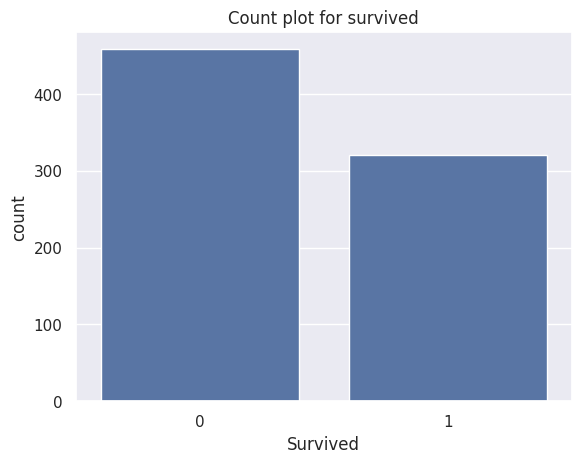

In [219]:
sns.countplot(x='Survived', data=titanic_data).set_title('Count plot for survived')

You can see that __more people died than survived.__ To know the exact count:

- Using groupby

In [220]:
titanic_data.head(1)

,Survived,Pclass,Age,Fare,Embarked,FarePerPass,GenderClass,FamilySize
0,0,3,22.0,7.25,S,7.25,male,2


In [221]:
titanic_data.groupby(['Survived'])['Fare'].median() #5 --2 and 3 d

,Fare
Survived,
0,13.00
1,26.25


Notice that __455__ people __died__ and only __319 survived.__

<a id=section402></a>

### 4.2 Who is more likely to survive, Male or Female?

First of all looking at how __Age is varying with gender.__

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Age Distribution using FacetGrid')

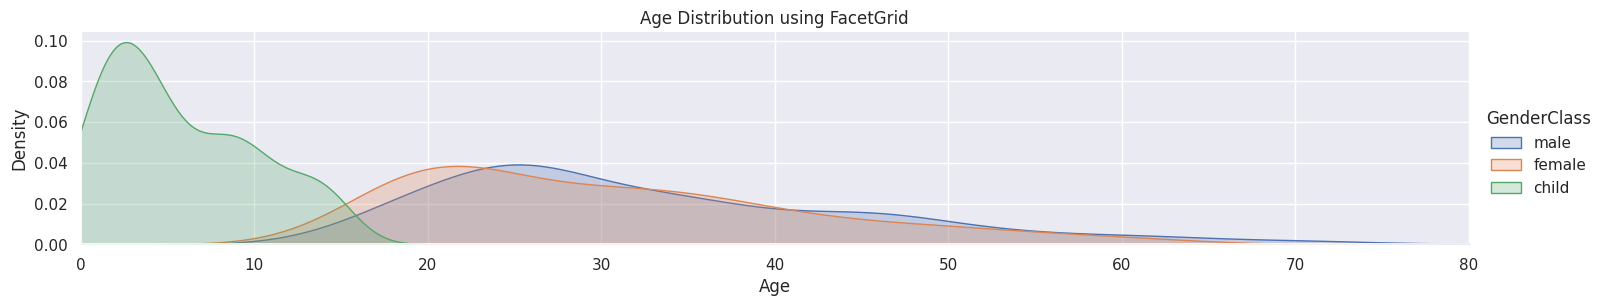

In [222]:

as_fig=sns.FacetGrid(titanic_data,hue='GenderClass', aspect=5) # Always assign HUE to categorical columns
as_fig.map(sns.kdeplot,'Age', shade=True)
oldest = titanic_data['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age Distribution using FacetGrid')


- In titanic RMS __child__ of Age __3-8__ yrs are in majority.
- Maximum __males and females__ are of Age __25-35__ yrs.

Using groupby

In [223]:
titanic_data.groupby(['Survived','GenderClass','Pclass'])['Survived'].value_counts()

Survived  GenderClass  Pclass
0         child        1           1
                       3          32
          female       1           2
                       2           6
                       3          53
          male         1          74
                       2          77
                       3         213
1         child        1           4
                       2          21
                       3          21
          female       1          88
                       2          56
                       3          47
          male         1          42
                       2           6
                       3          35
Name: count, dtype: int64

From the above you can see that its __difficult__ to absorb information quickly by looking at __numbers.__ Therefore we will make variety of plots to get clear vision of the scenario.

- Using catplot

Text(0.5, 1.0, 'Factor plot for male female and child')

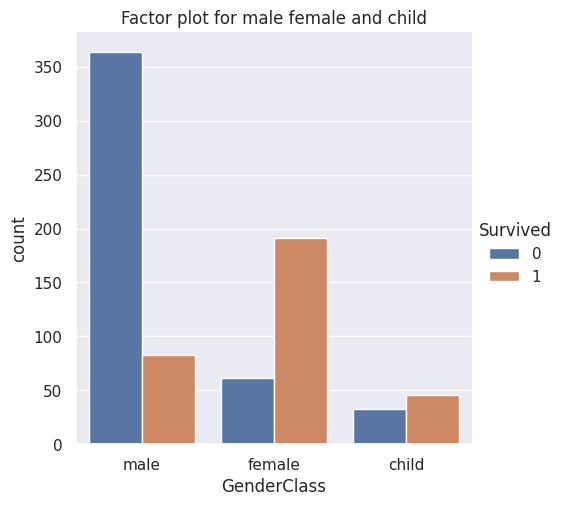

In [224]:
sns.catplot(x='GenderClass', hue='Survived', kind= 'count', data=titanic_data)
plt.title('Factor plot for male female and child')

In [225]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].count() # Total Female

np.int64(252)

In [226]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()# Total Female that survived

np.int64(191)

- Majority of __males died__.
- __Females__ have high probability to __survive.__

To know the exact %

In [227]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()

np.int64(191)

In [228]:
print("% of women survived: ", titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'female']['Survived'].count()*100)
print("% of male survived: ", titanic_data[titanic_data.GenderClass == 'male']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'male']['Survived'].count()*100)
print("% of children survived: ", titanic_data[titanic_data.GenderClass == 'child']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'child']['Survived'].count()*100)

% of women survived:  75.79365079365078
% of male survived:  18.568232662192393
% of children survived:  58.22784810126582


- Using pie plot

In [229]:
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts()

,count
Survived,
0,364
1,83


Text(0.5, 1.0, 'Survived (child)')

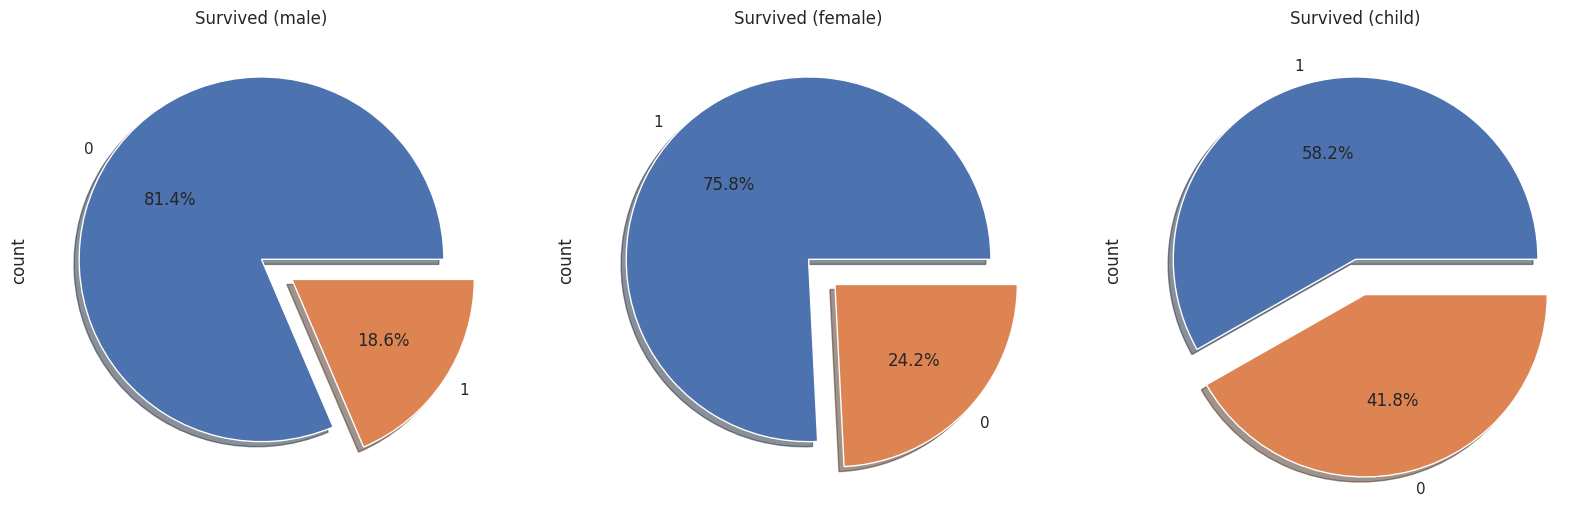

In [230]:
f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass']=='female'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass']=='child'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[2], shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')

From the above pie plot you can see how survival depends on whether the passenger is a child, male or female.
- __76% of females__ survived.
- __57% of children__ also survived.
- Only __16% of males__ survived.

In [231]:
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts()

,count
Survived,
0,364
1,83


In [232]:
titanic_data['Survived'][titanic_data['GenderClass']=='female'].value_counts()

,count
Survived,
1,191
0,61


<a id=section403></a>

### 4.4. What is the rate of survival of males, females and child on the basis of Passenger Class?

- Using mathematical function

In [233]:
print("% of Survuval in PClass=1: ", titanic_data[titanic_data.Pclass==1]['Survived'].sum()/ titanic_data[titanic_data.Pclass==1]['Survived'].count()*100)
print("% of Survuval in PClass=2: ", titanic_data[titanic_data.Pclass==2]['Survived'].sum()/ titanic_data[titanic_data.Pclass==2]['Survived'].count()*100)
print("% of Survuval in PClass=3: ", titanic_data[titanic_data.Pclass==3]['Survived'].sum()/ titanic_data[titanic_data.Pclass==3]['Survived'].count()*100)

% of Survuval in PClass=1:  63.507109004739334
% of Survuval in PClass=2:  50.0
% of Survuval in PClass=3:  25.6857855361596


- Using crosstab function

In [234]:
pd.crosstab([titanic_data.GenderClass, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

In [235]:
titanic_data.groupby(['Survived','GenderClass','Pclass'])['Survived'].value_counts()

Survived  GenderClass  Pclass
0         child        1           1
                       3          32
          female       1           2
                       2           6
                       3          53
          male         1          74
                       2          77
                       3         213
1         child        1           4
                       2          21
                       3          21
          female       1          88
                       2          56
                       3          47
          male         1          42
                       2           6
                       3          35
Name: count, dtype: int64

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

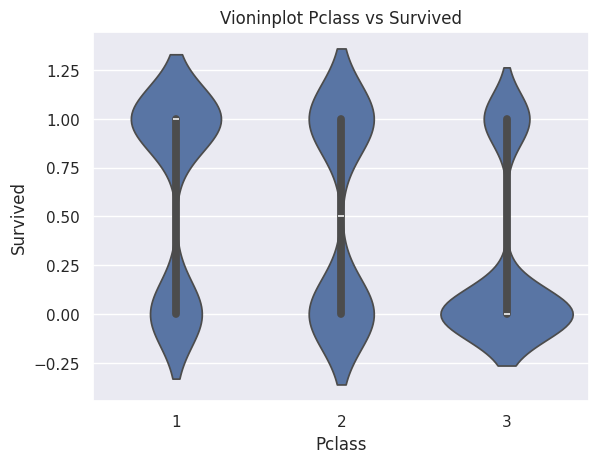

In [236]:
sns.violinplot(x='Pclass',y='Survived', data=titanic_data)
plt.title('Vioninplot Pclass vs Survived')
plt.show()

Above is another beautiful way to see how the survival rate is varying with Passenger class.
- __Pclass 3__ have __more__ people who __died__, and for __Pclass 1 survival rate is more.__

 Drawing __factorplot__ to look at the __distribution of popluation__ with __Pclass and GenderClass.__

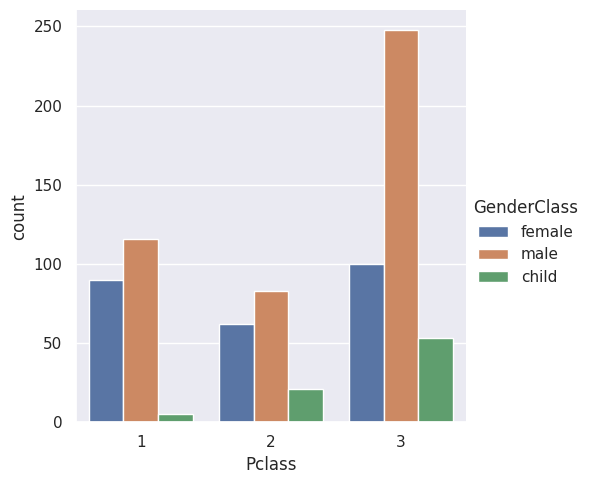

Text(0.5, 1.0, 'Factorplot with kind= "Count" for Pclass and GenderClass')

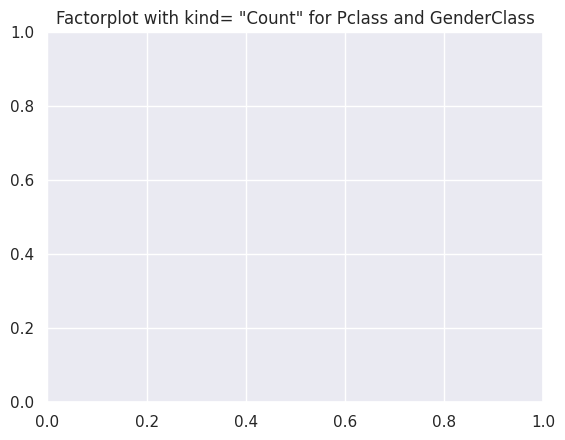

In [237]:
sns.catplot(x='Pclass', data=titanic_data, hue='GenderClass', kind='count')

plt.show()
plt.title('Factorplot with kind= "Count" for Pclass and GenderClass')

1. __Pclass 3__ have _maximum_ number of __males__
2. __Pclass 1__ have _minimum_ number of __children__.

- using factorplot to see the variation of __surviavl rate with Pclass and GenderClass.__

Text(0.5, 1.0, 'Factorplot for Survival rate variation with Pclass and GenderClass')

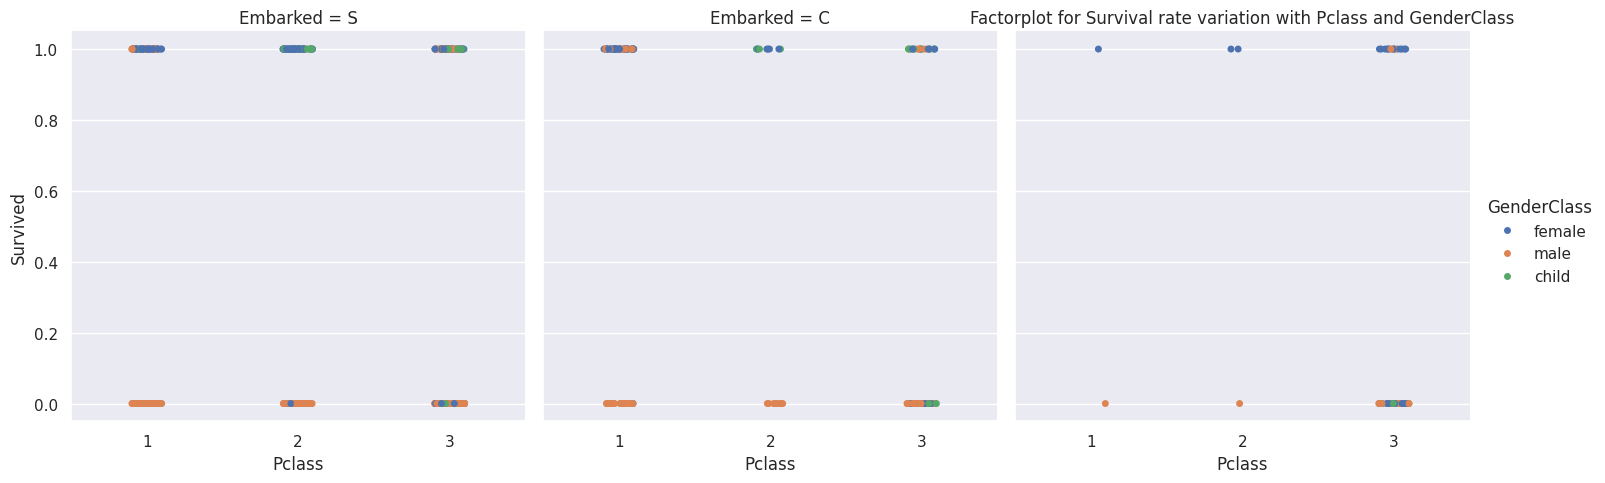

In [238]:
sns.catplot(x='Pclass',y='Survived', col='Embarked', data=titanic_data, hue='GenderClass')
plt.title('Factorplot for Survival rate variation with Pclass and GenderClass')

The above graph shows:
1. the survival rate for male is very __low__ _irrespective of the class_ he belongs to.
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Pclass __1 and 2 survived__ and __nearly all men__ in Pclass __2 and 3 died.__

<a id=section404></a>

### 4.4 What is the survival rate considering the Embarked variable?

- Using countplot

<Axes: xlabel='Embarked', ylabel='count'>

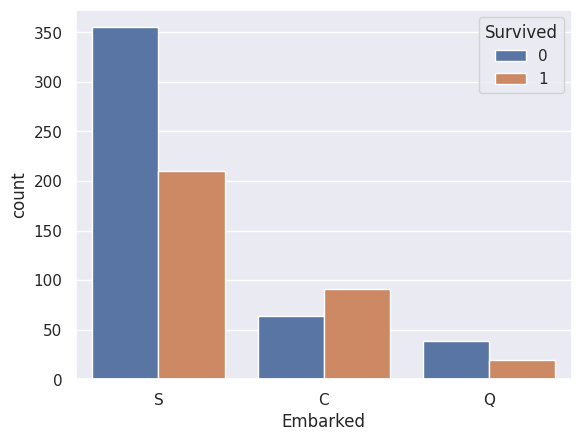

In [239]:
sns.countplot(x='Embarked', data=titanic_data, hue='Survived')

In [240]:
# 6% of the females survived from the overall data set and who embarked at C and were females.
100*titanic_data.groupby(['Embarked','GenderClass'])['Survived'].value_counts()/len(titanic_data)

Embarked  GenderClass  Survived
C         child        1            1.542416
                       0            0.385604
          female       1            7.069409
                       0            0.899743
          male         0            6.940874
                       1            3.084833
Q         child        0            0.514139
          female       1            2.056555
                       0            1.156812
          male         0            3.341902
                       1            0.385604
S         child        1            4.370180
                       0            3.341902
          female       1           15.424165
                       0            5.784062
          male         0           36.503856
                       1            7.197943
Name: count, dtype: float64

1. __Maximum___ number of people have __Southampton__ as port of embarkment.
2. Also observe people who boarded at _Cherbourg_, _more_ people _survived than died_, and this is reverse for Queenstown.

- Using __factorplot__ and __kind = 'point'__

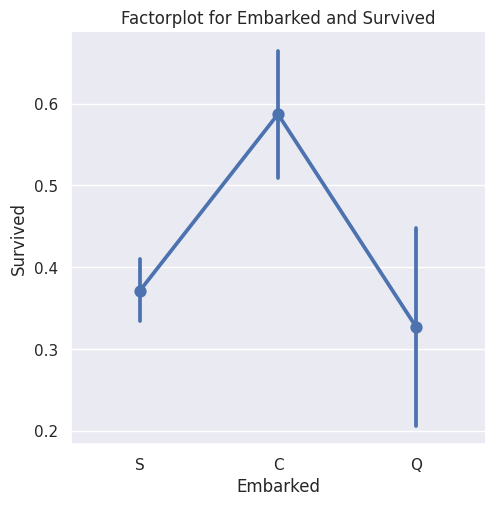

In [241]:
sns.catplot(x= 'Embarked',y='Survived', kind='point' ,data=titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

<a id=section405></a>

### 4.5. Survival rate - Comparing Embarked and Sex.

- Distribution of _GenderClass_ with respect to _Port of Embarkment_ using __Countplot__.

<Axes: xlabel='Embarked', ylabel='count'>

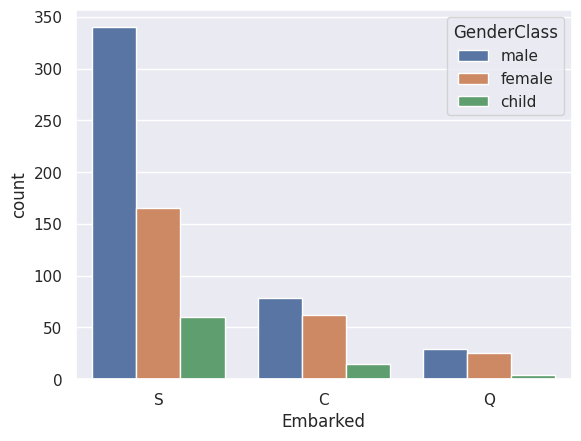

In [242]:
sns.countplot(x='Embarked', data=titanic_data, hue='GenderClass')

Most of the people boarded from __S__, Also among all who boarded, __males__ constitutes the __majority__ of percentage.

- Using Factorplot to see variation of __survival rate with port of embarkment and GenderClass__

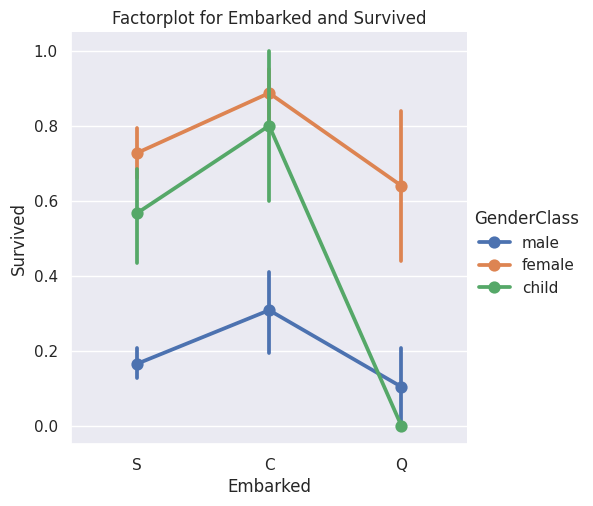

In [244]:
sns.catplot(x='Embarked',y='Survived', kind='point', hue='GenderClass', data=titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

- Chances of survival of __females__ who boarded from __C__ is _highest_.
- Chances of survival of __males__ boarding from __Q__ is _lowest_

<a id=section406></a>

### 4.6 How survival rate vary with Embarked, Sex and Pclass.

Seeing relation between Pclass and Embarked.

Text(0.5, 1.0, 'Relation between Pclass and Embarked')

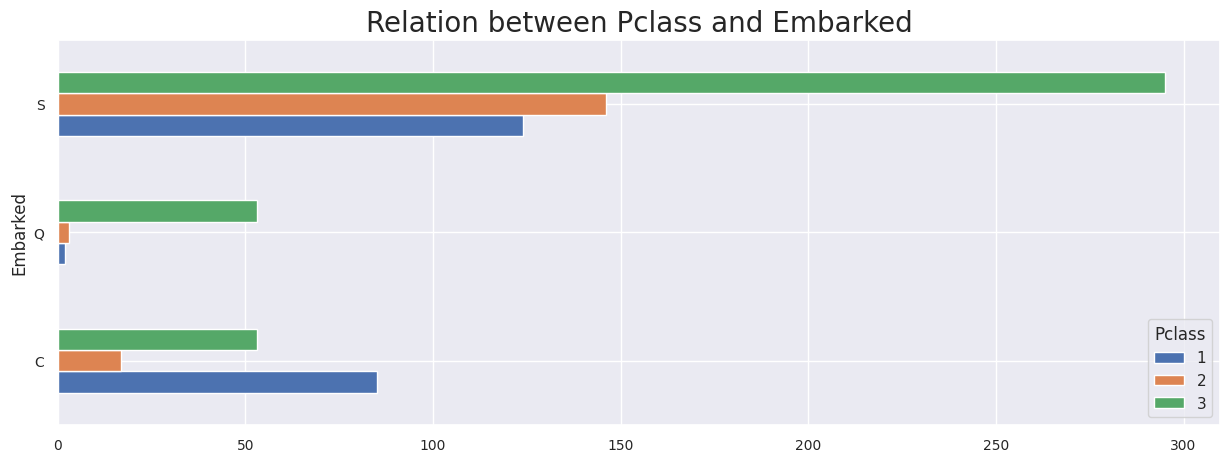

In [245]:
relation = pd.crosstab(titanic_data.Embarked, titanic_data.Pclass)
relation.plot.barh(figsize=(15,5))
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Relation between Pclass and Embarked', size=20)

Maximum people who boarded from __S__ belongs to __Pclass 3__.<br/>
Most of the passengers belonging to __Pclass 1__ boarded from __C and S__  


- Using Swarmplot

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Embarked', ylabel='Age'>

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


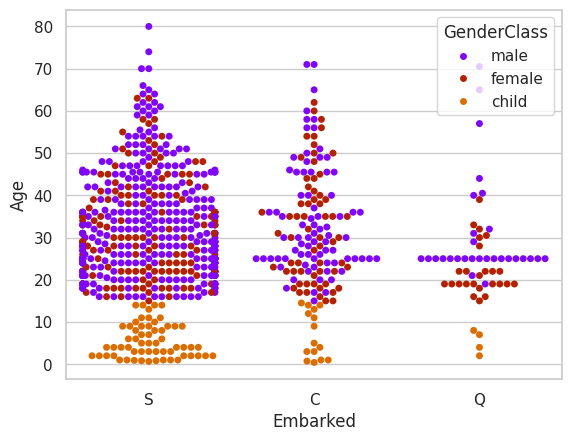

In [246]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x='Embarked',y='Age', hue='GenderClass', palette='gnuplot', data=titanic_data)

- Using factorplot with kind = 'point'

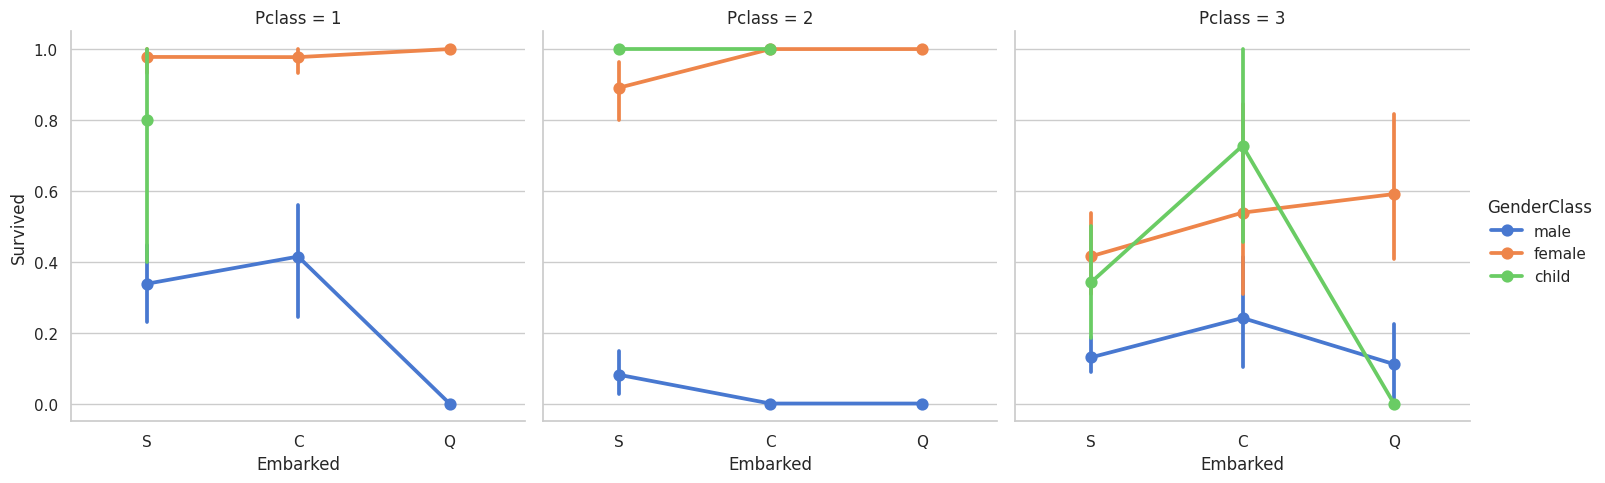

In [247]:
sns.catplot(x='Embarked',y='Survived',col='Pclass', hue='GenderClass', kind='point', data=titanic_data)
plt.show()

- Practically all _women_ of __Pclass 2__ that embarked in __C and Q survived__, also nearly all _women_ of __Pclass 1__ survived_.
- All _men_ of __Pclass 1 and 2__ embarked in __Q died__, survival rate for men in __Pclass 2 and 3__ is always __below 0.2__.
- For the remaining men in Pclass 1 that embarked in S and C, survival rate is approx. __0.4__

<a id=section407></a>

### 4.7 Segment age in bins with size 10.

In [248]:
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['Age']<=i*10, 'Age_bin']=i # 80,70,60,50....

In [ ]:
print(titanic_data[['Age','Age_bin']])

<Axes: xlabel='Age_bin', ylabel='Survived'>

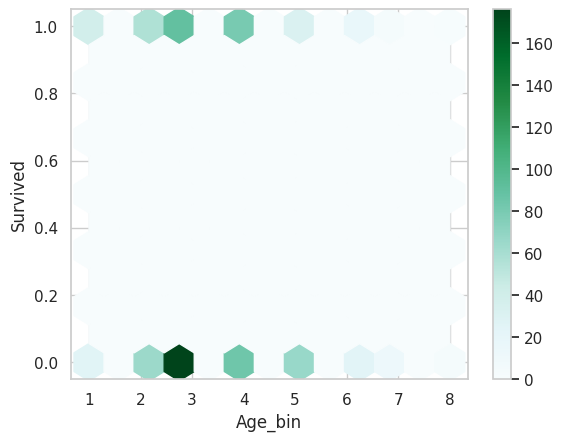

In [249]:
titanic_data.plot.hexbin(x='Age_bin', y='Survived', gridsize=12, legend=True)

Comparing count of those who survived and died with respect to the Age_bin they are in.
- __Age_bin 1__: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means __more children survived than died__.
- __Age_bin 3__: __More died than survived__, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group.
- __Age_bin >4__: More people died than survived.

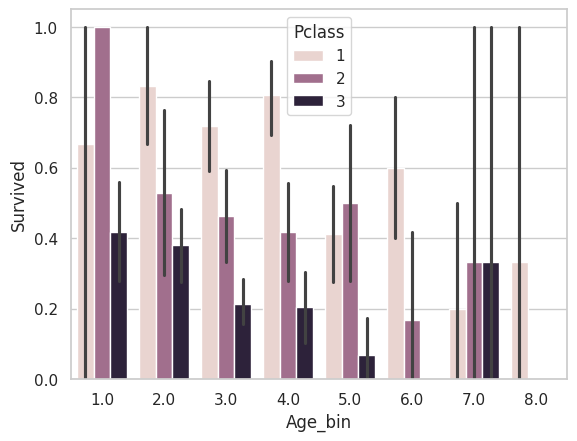

In [250]:
sns.barplot(x='Age_bin',y='Survived', hue='Pclass', data=titanic_data)
plt.show()

- Calculating number of people of Age_bin = 1 and 8 from each Pclass.

In [ ]:
titanic_data[(titanic_data.Age_bin==1)]['Pclass'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==8)]['Age'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==1)&(titanic_data.Pclass==1)]['Survived']

In [ ]:
titanic_data[(titanic_data.Age_bin==8)]['Pclass'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==8)& (titanic_data.Pclass==1)]['Survived'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==8)& (titanic_data.Pclass==3)]['Survived'].value_counts()

- Among children of __age 0-10 yrs__ we dont have enough data points(3) in Pclass 1, therefore __discarding it__ (blue line of Age_bin 1)<br/>
- Also number of passengers belonging to age group __70-80 yrs__, is very less, therefore __ignoring them.__<br/>
- In __each Pclass__, we can see that the probability of survivying of __small children(Age = 0-10 yrs)__ is _higher_ than rest age group.<br/>
- In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), __survival probability is highest for Pclass 1 and lowest for Pclass 3.__

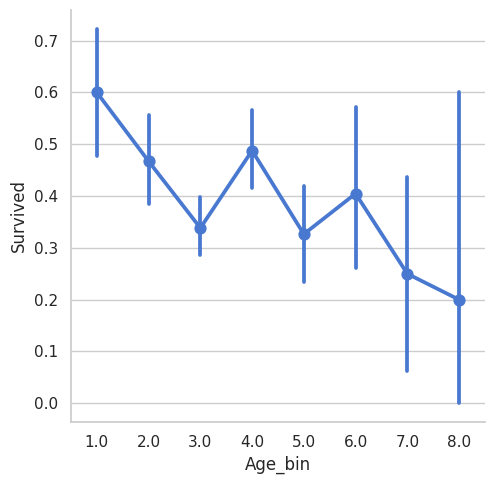

In [256]:
sns.catplot(x='Age_bin', y='Survived',kind='point',data=titanic_data)
plt.show()

In [ ]:
sns.factorplot('Age_bin', 'Survived',kind='point',hue='GenderClass',data=titanic_data)
plt.show()

Its clear from the above graph that among people of all the ages, __females__ in general have __higher probability of survival than males__.

In [ ]:
sns.catplot(x='Age_bin',y='Survived', col='Pclass', row='GenderClass',kind='point',hue='Embarked',data=titanic_data)
plt.show()

From the factor plot:<br/>

- In general for males, as __Pclass increases, survival probability decreases.__
- For the rest of the females, as _Pclass increases_, _survival probability decreases._<br/>
- You can also see survival rate within each Pclass for males and females.

<a id=section408></a>

### 4.8 Analysing survival rate with FamilySize.

- Using __factorplot__ to know the survival rate on the basis of __FamilySize__.

/tmp/ipython-input-1710409435.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.catplot(x='FamilySize', y='Survived',data=titanic_data, kind='violin', aspect=1.5, palette='Greens')


Text(0.5, 1.0, 'Survival by Total Family Size')

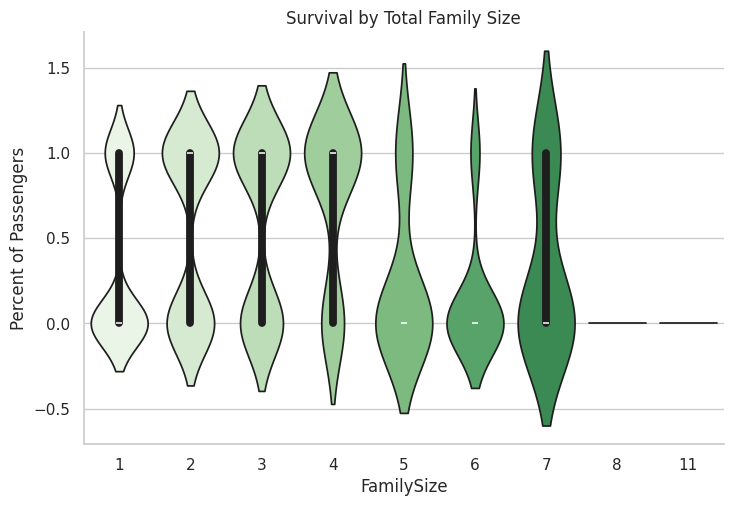

In [260]:
ax= sns.catplot(x='FamilySize', y='Survived',data=titanic_data, kind='violin', aspect=1.5, palette='Greens')
ax.set(ylabel="Percent of Passengers")
plt.title('Survival by Total Family Size')

In [259]:
titanic_data.head()

,Survived,Pclass,Age,Fare,Embarked,FarePerPass,GenderClass,FamilySize,Age_bin
0,0,3,22.0,7.2500,S,7.2500,male,2,3.0
1,1,1,38.0,71.2833,C,71.2833,female,2,4.0
2,1,3,26.0,7.9250,S,7.9250,female,1,3.0
3,1,1,35.0,53.1000,S,26.5500,female,2,4.0
4,0,3,35.0,8.0500,S,8.0500,male,1,4.0


As __size of family increases__ its chances of survival also __increases__.

<a id=section409></a>

### 4.9 Segment fare in bins of size 12.

- Using Distplot to see the distribution of __Fare__.

/tmp/ipython-input-1812344245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['FarePerPass'], color='g')


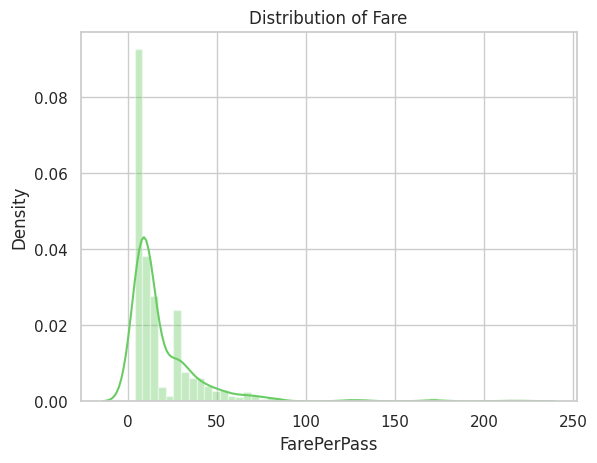

In [267]:
sns.distplot(titanic_data['FarePerPass'], color='g')
plt.title('Distribution of Fare')
plt.show()

We have seen that __'Fare'__ mostly varies between __10 and 90.__ We will use this information to create bins.

- Creating a new column named __'Fare_bin'__ based on 12 interval ranges in 'Fare' as __12 bins.__

In [270]:
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['FarePerPass']<=i*10, 'Fare_bin']=i
titanic_data.loc[titanic_data['Fare']>80, 'Fare_bin']=8

In [271]:
titanic_data[['Fare','Fare_bin']].groupby('Fare_bin')['Fare'].mean()

,Fare
Fare_bin,
1.0,13.842332
2.0,20.294902
3.0,38.596745
4.0,52.298740
5.0,46.876200
6.0,53.132878
7.0,61.972925
8.0,153.461495


/tmp/ipython-input-3354474531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Fare_bin'], color='g')


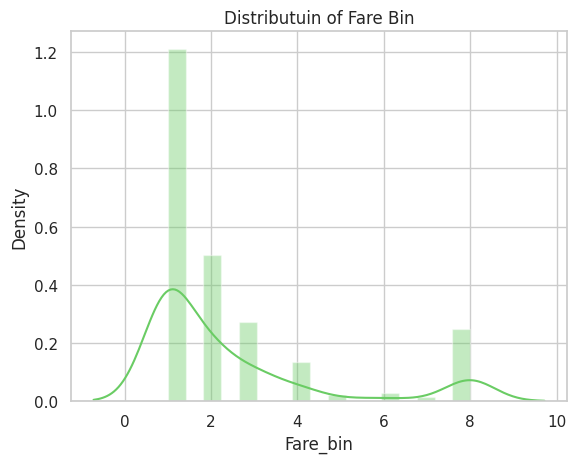

In [272]:
sns.distplot(titanic_data['Fare_bin'], color='g')
plt.title('Distributuin of Fare Bin')
plt.show()

In [ ]:
titanic_data['Fare'].mean()
titanic_data['Fare'].median()

- Using __barrplot__ to plot the relationship between __survival rate and Fare_bin and Pclass.__

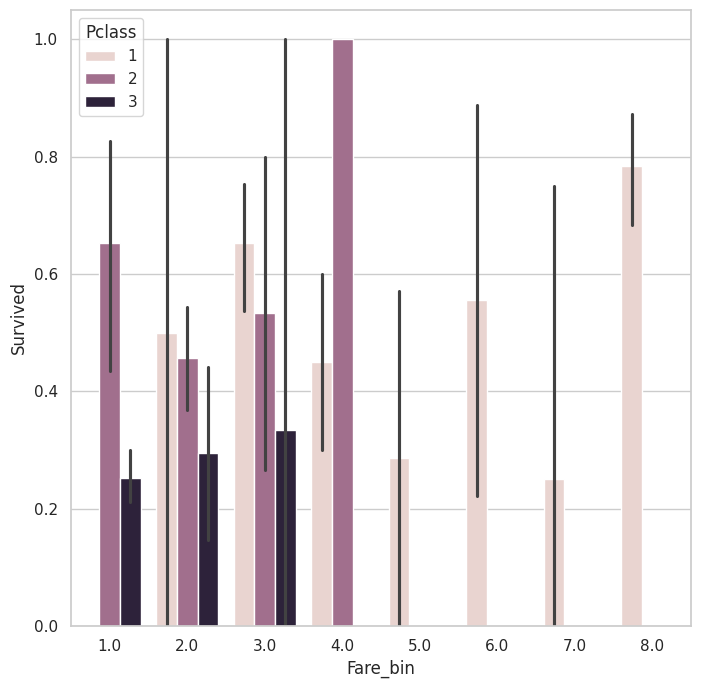

In [273]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Fare_bin', y='Survived', hue='Pclass', data=titanic_data, ax=ax)
plt.show()

- As __fare increases, survival chances also increases__.
- Also __Pclass 1__ (blue color) have __more chances to survive__ compared to other Pclass.

<a id=section410></a>

### 4.10 Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'

Text(0.5, 1.0, 'Pair Plot')

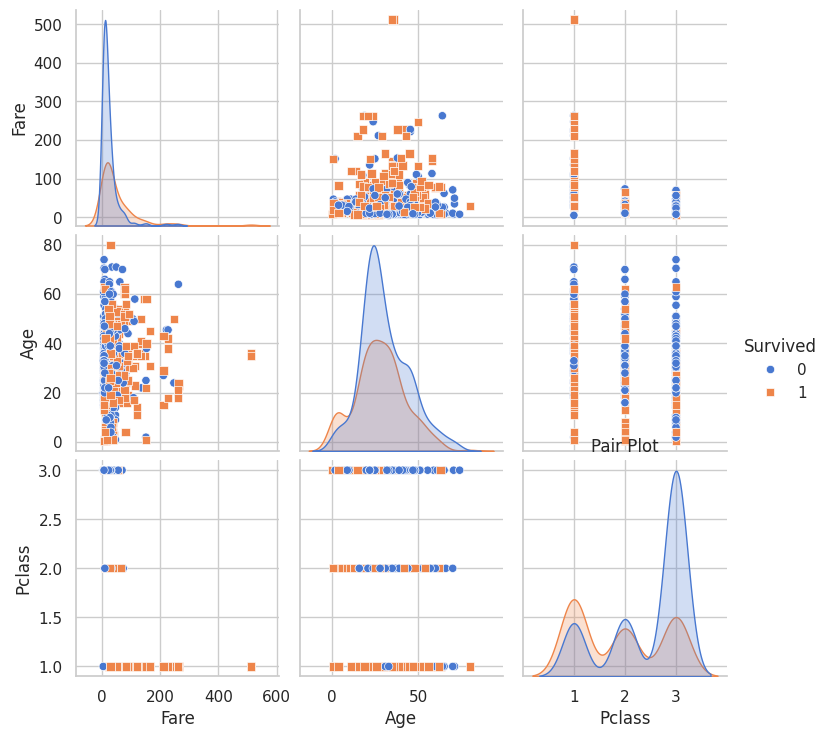

In [274]:
sns.pairplot(titanic_data[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'], hue='Survived', dropna=True, markers=['o','s'])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

<a id=section411></a>

### 4.11 Establish coorelation between all the features using heatmap.

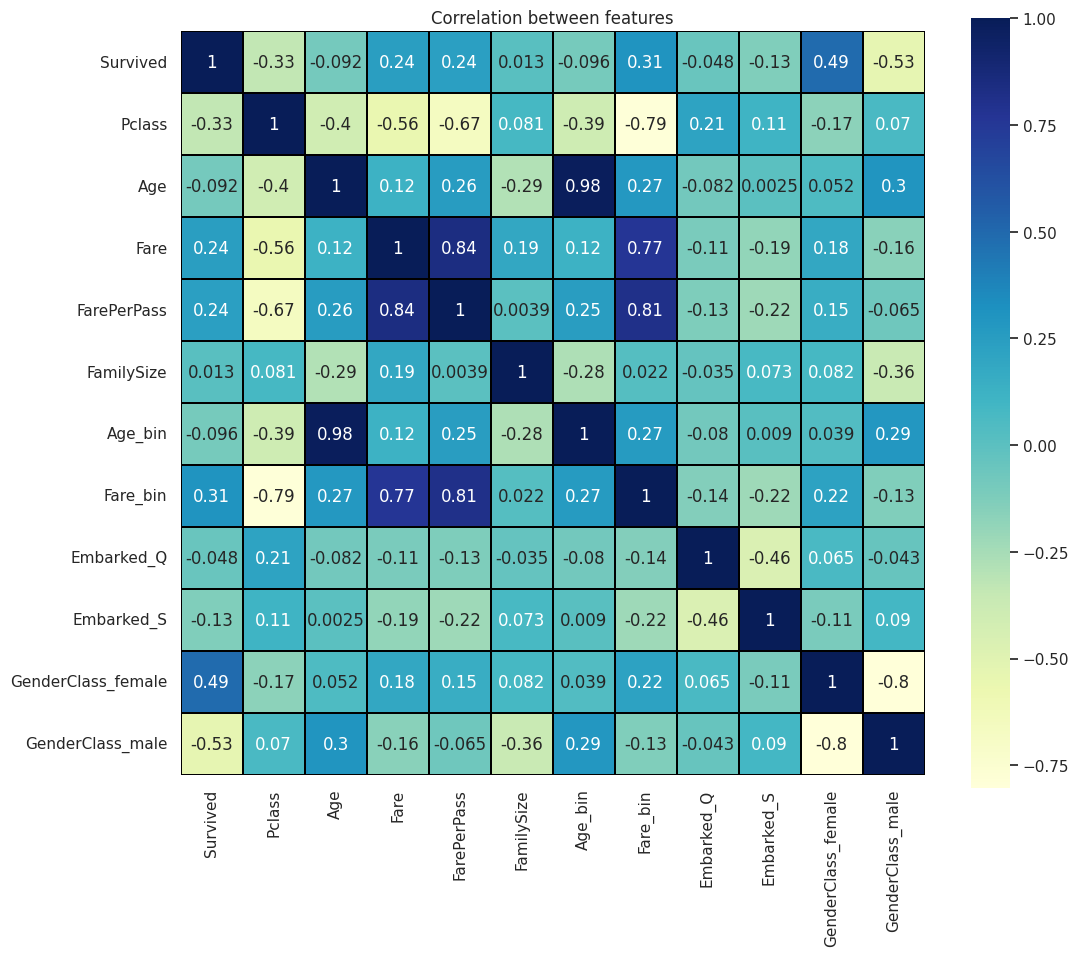

In [278]:
# Convert categorical columns to numerical using one-hot encoding
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Embarked', 'GenderClass'], drop_first=True)


corr = titanic_data_encoded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=1, linewidth=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')
plt.show()

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section412></a>

### 4.12 Hypothesis: Women and children are more likely to survive

On studying Questionnaire 4.1, 4.2 and 4.3 we observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

<a id=section5></a>

## 5. Conclusion

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival.
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Age, Embarked, Fare, SibSp and Parch_ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with.__
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset.